In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import spacy
import re
import spacy.cli
spacy.cli.download('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')
import  nltk
print(nltk.__version__)
import pickle
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
3.7


In [3]:
import keras.utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM
from keras.utils import pad_sequences
from keras.layers import Dense, Embedding
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import Model
from keras.utils import to_categorical
from keras.utils import pad_sequences 


In [5]:
with open ('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_en_10K.pkl', mode='br') as inputfile:
  df_en = pickle.load(inputfile)

In [6]:
df_en

,Artist,Song,Genre,Language,Lyrics
0,switchfoot,awakening,Rock,en,face down with the la curbside endings and the...
1,the supremes,get ready,Pop,en,i never met a boy who makes me feel the way th...
2,the twilight sad,half a person,Rock,en,call me morbid call me pale i ve spent six yea...
3,bill monroe,wayfaring stranger,Country,en,i am a poor wayfaring stranger traveling throu...
4,erasure,boy,Pop,en,love you boy till i fall the child in me again...
...,...,...,...,...,...
9995,carcass,forensic clinicism the sanguine article,Metal,en,salutiferous exaltation through fusty spatteri...
9996,felix da housecat,ready 2 wear,Electronic,en,you are a star you wear it well you blow my mi...
9997,donna summer,there goes my baby,Pop,en,all alone i sit looking out of the window and ...
9998,elton john,all across the havens,Rock,en,music by elton john lyrics by bernie taupin re...


In [7]:
df_en.shape

(10000, 5)

In [8]:
categories3 = ['Rock', 'Pop', 'Metal']

df_en_3 = df_en[df_en['Genre'].isin(categories3)]

In [9]:
df_en_3

,Artist,Song,Genre,Language,Lyrics
0,switchfoot,awakening,Rock,en,face down with the la curbside endings and the...
1,the supremes,get ready,Pop,en,i never met a boy who makes me feel the way th...
2,the twilight sad,half a person,Rock,en,call me morbid call me pale i ve spent six yea...
4,erasure,boy,Pop,en,love you boy till i fall the child in me again...
5,august burns red,fault line,Metal,en,we all hurt we all need we all cry we all blee...
...,...,...,...,...,...
9994,anastacia,heavy rotation,Pop,en,i m on air in a turning motion and i don t wan...
9995,carcass,forensic clinicism the sanguine article,Metal,en,salutiferous exaltation through fusty spatteri...
9997,donna summer,there goes my baby,Pop,en,all alone i sit looking out of the window and ...
9998,elton john,all across the havens,Rock,en,music by elton john lyrics by bernie taupin re...


In [10]:
labels = df_en_3['Genre'].unique()

Text(0.5, 1.0, 'Class Distribution')

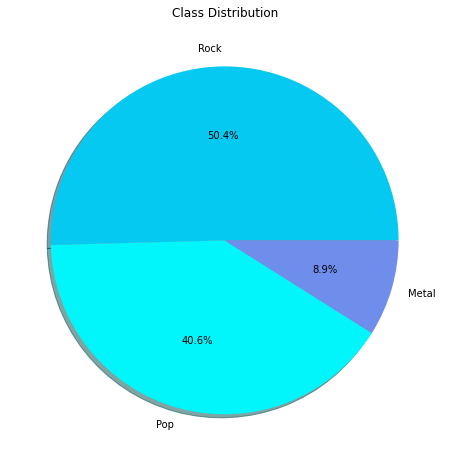

In [11]:
plt.rcParams["figure.figsize"] = [12,8]
colors = ['#05c9f0', '#00f6fa', '#6f8eec']
plt.pie(df_en_3['Genre'].value_counts(), labels =labels, autopct = '%1.1f%%',colors = colors, shadow = True)
plt.title('Class Distribution')

#Splitting the dataset in training set and test set

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
en_train, en_test = sklearn.model_selection.train_test_split(df_en_3, test_size=0.20, train_size=0.80)

In [14]:
en_train.shape

(6850, 5)

In [15]:
en_test.shape

(1713, 5)

In [16]:
en_test['Genre'].value_counts() 

Rock     856
Pop      709
Metal    148
Name: Genre, dtype: int64

#Tokenizing the lyrics with spacy

In [17]:
x_train = en_train['Lyrics'].tolist()
y_train = en_train['Genre'].tolist()

In [18]:
x_test = en_test['Lyrics'].tolist()
y_test = en_test['Genre'].tolist()

In [19]:
len(x_train), len(y_train), len(x_test), len(y_test)

(6850, 6850, 1713, 1713)

In [20]:
set(y_train)

{'Metal', 'Pop', 'Rock'}

In [21]:
sample_idx = 1345
x_train[sample_idx]

'scoff at the bloodloss no feeling of repulsion grabbing at insanity life is your illusion you will die i will not cry i will live you will not you will die i will not cry black expands dying s at hand stand firm upon battlements many fall orders followed weak die embarrassment heroes names are hallowed to die alone in terror many die in horror bodies clutch together for peace to try and restore you will die i will not cry i will live you will not you will die i will not cry black expands dying s at hand plans are laid bodies displayed lands are taken bones are breaking scoff at the bloodloss no feeling of repulsion grabbing at insanity life is your illusion you will die i will not cry i will live you will not you will die i will not cry black expands dying s at hand stand firm upon battlements many fall orders followed weak die embarrassment heroes names are hallowed to die alone in terror many die in horror bodies clutch together for peace to try and restore you will die i will not c

In [22]:
y_train[sample_idx]

'Metal'

In [23]:
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

stopword_list = stopwords.words('english')
punctuations = string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [24]:
def spacy_tokenizer (text):
   
    doc = nlp(text)

    #lemmatizing tokens and lowering case
    lemmas = [token.lemma_.lower() for token in doc]

    #removing stopwords and punctuations
    lemmas_stop= [token for token in lemmas if token not in stopword_list and token not in punctuations]  

    lemma_bigrams = ['BI_'+p1+'_'+p2 for p1,p2 in nltk.ngrams(lemmas_stop,2)]
    lemma_trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(lemmas_stop,3)] 
    
    all_tokens = list()
    all_tokens.extend(lemmas_stop)
    all_tokens.extend(lemma_bigrams)
    all_tokens.extend(lemma_trigrams)
    return all_tokens

In [25]:
vectors = CountVectorizer (analyzer = spacy_tokenizer, min_df = 10)

In [26]:
print ('fit')
vectors.fit(x_train)
print('transform')
x_train_tok = vectors.transform(x_train)
x_test_tok = vectors.transform(x_test)
print ('done')

fit
transform
done


In [27]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/en3_x_train_tok.pkl', 'wb') as outfile:
  pickle.dump(x_train_tok, outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/en3_x_test_tok.pkl', 'wb') as outfile:
  pickle.dump(x_test_tok, outfile)

In [28]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/en3_x_train_tok.pkl', mode = 'br') as infile:
  x_train_tok = pickle.load(infile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/en3_x_test_tok.pkl', mode = 'br') as infile:
  x_test_tok = pickle.load(infile)

In [29]:
len(vectors.vocabulary_)

9352

In [30]:
vectors.vocabulary_

{'sink': 8528,
 'deep': 6492,
 'sin': 8519,
 'far': 6799,
 'peaceful': 7955,
 'shore': 8488,
 'deeply': 6493,
 'stain': 8690,
 'within': 9274,
 'rise': 8285,
 'master': 7619,
 'sea': 8397,
 'hear': 7161,
 'cry': 6413,
 'water': 9189,
 'lift': 7495,
 'safe': 8345,
 'love': 7554,
 'nothing': 7826,
 'else': 6688,
 'could': 6357,
 'help': 7181,
 'soul': 8635,
 'danger': 6447,
 'look': 7536,
 'jesus': 7352,
 'completely': 6299,
 'save': 8369,
 'angry': 5781,
 'wave': 9191,
 'mighty': 7666,
 'true': 9037,
 'good': 7049,
 'song': 8627,
 'faithful': 6783,
 'service': 8433,
 'belong': 5935,
 'BI_nothing_else': 3410,
 'BI_else_could': 901,
 'soon': 8629,
 'come': 6284,
 'big': 5953,
 'ass': 5824,
 'closet': 6252,
 'trippin': 9032,
 'booty': 6016,
 'chain': 6165,
 'heavy': 7173,
 'cost': 6353,
 'penny': 7963,
 'pay': 7952,
 'rocket': 8294,
 'dam': 6440,
 'get': 7005,
 'niggas': 7805,
 'pocket': 8041,
 'hell': 7178,
 'bitch': 5963,
 'son': 8626,
 'em': 6690,
 'star': 8699,
 'fuck': 6956,
 'say': 8

#SVM Classification - 3 classes

---






Classification report:
              precision    recall  f1-score   support

       Metal       0.57      0.35      0.43       148
         Pop       0.65      0.59      0.62       709
        Rock       0.64      0.74      0.69       856

    accuracy                           0.64      1713
   macro avg       0.62      0.56      0.58      1713
weighted avg       0.64      0.64      0.64      1713

Confusion matrix:
[[ 52  27  69]
 [  9 417 283]
 [ 31 195 630]]


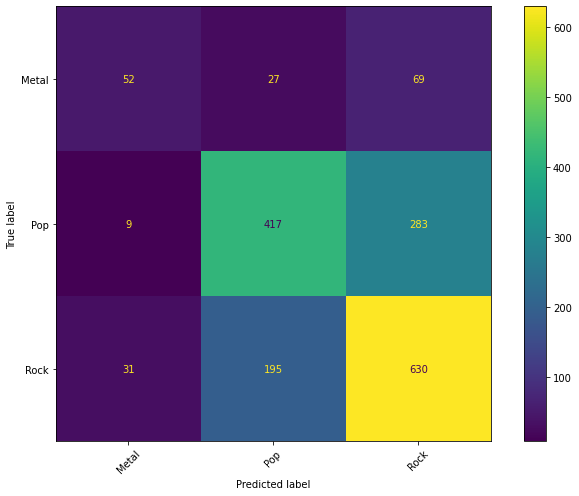

In [31]:
svm_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 2)), #tokenization
    ('sel', SelectKBest(chi2, k=3000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(x_train,y_train)
predictions = svm_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

ConfusionMatrixDisplay.from_estimator(svm_pipeline, x_test, y_test)  
plt.xticks(rotation=45)
plt.show()

In [32]:
opt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

param_grid = [{'sel__k': [1000, 2000, 3000,'all'], 'learner__C': [0.01, 0.1, 1, 10, 100]}]
SVM_opt_search = GridSearchCV(opt_pipeline, param_grid, cv=None, n_jobs = 3, verbose=True).fit(x_train_tok,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [33]:
SVM_opt_search.best_params_

{'learner__C': 0.1, 'sel__k': 3000}

In [34]:
SVM_opt_search.best_estimator_

Pipeline(steps=[('sel',
                 SelectKBest(k=3000,
                             score_func=<function chi2 at 0x7f959c342f80>)),
                ('tfidf', TfidfTransformer()), ('learner', LinearSVC(C=0.1))])

In [35]:
opt_predictions = SVM_opt_search.best_estimator_.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, opt_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, opt_predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

       Metal       0.80      0.22      0.35       148
         Pop       0.66      0.56      0.60       709
        Rock       0.63      0.79      0.70       856

    accuracy                           0.64      1713
   macro avg       0.70      0.52      0.55      1713
weighted avg       0.65      0.64      0.63      1713

Confusion matrix:
[[ 33  27  88]
 [  1 394 314]
 [  7 177 672]]


# Random Forest Classification - 3 classes

---




In [36]:
RF_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=3000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier())  # learning algorithm
])

RF_pipeline.fit(x_train_tok,y_train)
predictions = RF_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

       Metal       0.90      0.06      0.11       148
         Pop       0.78      0.47      0.59       709
        Rock       0.61      0.90      0.72       856

    accuracy                           0.65      1713
   macro avg       0.76      0.48      0.48      1713
weighted avg       0.70      0.65      0.62      1713

Confusion matrix:
[[  9   9 130]
 [  1 335 373]
 [  0  85 771]]


#LSTM Classification - 3 classes

---



---



In [37]:
en_train['Genre_number'] = en_train['Genre']

numbers = []

for i in en_train['Genre']:
  if i == 'Rock':
    numbers.append(0)

  if i == 'Pop':
    numbers.append(1)
  
  elif i == 'Metal':
    numbers.append(2)
  
  

In [38]:
en_train['Genre_number'] = numbers

In [39]:
en_test['Genre_number'] = en_test['Genre']

numbers_test = []

for i in en_test['Genre']:
  if i == 'Rock':
    numbers_test.append(0)

  if i == 'Pop':
    numbers_test.append(1)
  
  elif i == 'Metal':
    numbers_test.append(2)
  

In [40]:
en_test['Genre_number'] = numbers_test

In [41]:
y_train = en_train['Genre_number'] #substituting the columns in the variables
y_test = en_test['Genre_number']

In [42]:
y_train = to_categorical(y_train,3)  #converting to one-hot vectors
y_test = to_categorical(y_test, 3)

In [43]:
y_train.shape, y_test.shape

((6850, 3), (1713, 3))

In [44]:
#max number of words to be used
max_features = 20000

#fixed size
embed_size = 128

batch_size = 64
epochs = 10

tokenizer = Tokenizer(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=200) #maxlen=max number of words in each lyrics
X_test_final = pad_sequences(list_tokenized_test, maxlen=200)

In [45]:
X_train_final.shape, y_train.shape

((6850, 200), (6850, 3))

In [46]:
X_test_final.shape, y_test.shape

((1713, 200), (1713, 3))

In [47]:
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(LSTM(10, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 10)                5560      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 12)                132       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0

In [48]:
lstm3 = model.fit(X_train_final, y_train,
                 batch_size=batch_size, 
                 epochs=epochs, 
                 shuffle = True, 
                 validation_split=0.2, 
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
lstm3

Epoch 1/10
86/86 [==============================] - 28s 259ms/step - loss: 0.9932 - accuracy: 0.4925 - val_loss: 0.9366 - val_accuracy: 0.5102
Epoch 2/10
86/86 [==============================] - 26s 305ms/step - loss: 0.9419 - accuracy: 0.4984 - val_loss: 0.9259 - val_accuracy: 0.5102
Epoch 3/10
86/86 [==============================] - 26s 296ms/step - loss: 0.9349 - accuracy: 0.5020 - val_loss: 0.9224 - val_accuracy: 0.5102
Epoch 4/10
86/86 [==============================] - 21s 250ms/step - loss: 0.9338 - accuracy: 0.5046 - val_loss: 0.9220 - val_accuracy: 0.5102
Epoch 5/10
86/86 [==============================] - 22s 251ms/step - loss: 0.9316 - accuracy: 0.5042 - val_loss: 0.9220 - val_accuracy: 0.5102
Epoch 6/10
86/86 [==============================] - 22s 252ms/step - loss: 0.9322 - accuracy: 0.5042 - val_loss: 0.9212 - val_accuracy: 0.5102
Epoch 7/10
86/86 [==============================] - 28s 328ms/step - loss: 0.9313 - accuracy: 0.5042 - val_loss: 0.9211 - val_accuracy: 0.5102

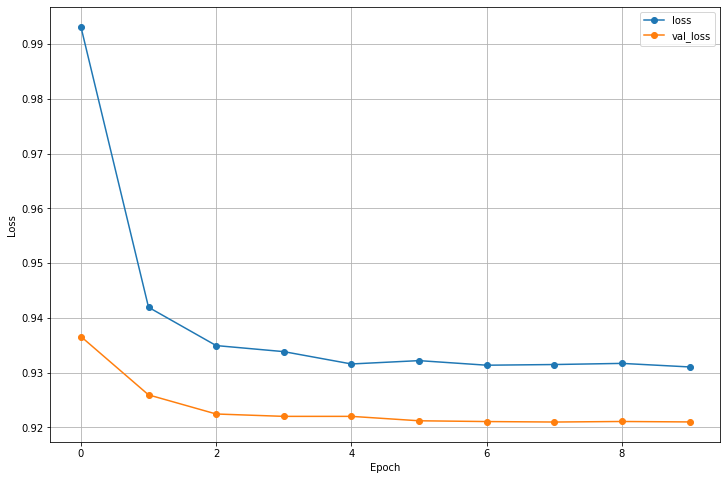

In [49]:
plt.plot(lstm3.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM Classification

In [50]:
lstm3_pred = np.round(model.predict(X_test_final))

54/54 [==============================] - 2s 23ms/step


In [51]:
print('Accuracy %s' % accuracy_score(y_test, lstm3_pred))
print('F1-score %s' % f1_score(y_test, lstm3_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3_pred))

Accuracy 0.4997081144191477
F1-score [0.66640716 0.         0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       856
           1       0.00      0.00      0.00       709
           2       0.00      0.00      0.00       148

   micro avg       0.50      0.50      0.50      1713
   macro avg       0.17      0.33      0.22      1713
weighted avg       0.25      0.50      0.33      1713
 samples avg       0.50      0.50      0.50      1713



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#CNN Classification - 3 Classes

In [52]:
#max number of words to be used
max_features = 20000
#fixed size
embed_size = 128

batch_size = 64
epochs = 20
filters = 10
kernel_size = 3
hidden_dims = 10

tokenizer = Tokenizer(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=200)
X_test_final = pad_sequences(list_tokenized_test, maxlen=200)

In [53]:
model = Sequential()

model.add(Embedding(max_features, embed_size))
model.add(Dropout(0.4))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

#vanilla dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#vanilla dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#output layer
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 dropout_3 (Dropout)         (None, None, 128)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 10)          3850      
                                                                 
 global_max_pooling1d (Globa  (None, 10)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                      

In [54]:
cnn3= model.fit(X_train_final, y_train, 
          batch_size = batch_size, 
          epochs=epochs, 
          shuffle=True, 
          validation_split=0.1,
          callbacks= [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
97/97 [==============================] - 9s 83ms/step - loss: 0.9950 - accuracy: 0.4676 - val_loss: 0.9236 - val_accuracy: 0.5416
Epoch 2/20
97/97 [==============================] - 9s 92ms/step - loss: 0.9419 - accuracy: 0.4889 - val_loss: 0.9046 - val_accuracy: 0.5416
Epoch 3/20
97/97 [==============================] - 6s 62ms/step - loss: 0.9286 - accuracy: 0.5024 - val_loss: 0.8938 - val_accuracy: 0.5416
Epoch 4/20
97/97 [==============================] - 9s 88ms/step - loss: 0.9216 - accuracy: 0.5147 - val_loss: 0.8896 - val_accuracy: 0.5416
Epoch 5/20
97/97 [==============================] - 6s 62ms/step - loss: 0.9194 - accuracy: 0.5210 - val_loss: 0.8868 - val_accuracy: 0.5387
Epoch 6/20
97/97 [==============================] - 6s 62ms/step - loss: 0.9191 - accuracy: 0.5290 - val_loss: 0.8870 - val_accuracy: 0.5591
Epoch 7/20
97/97 [==============================] - 6s 62ms/step - loss: 0.9177 - accuracy: 0.5273 - val_loss: 0.8916 - val_accuracy: 0.5489
Epoch 8/20
97

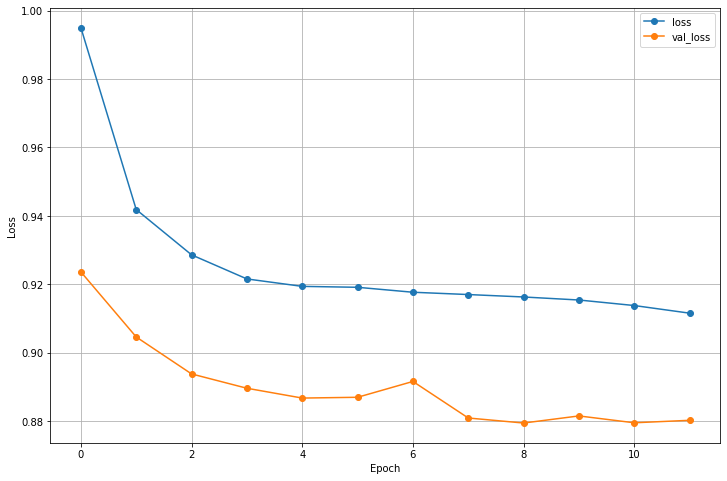

In [55]:
plt.plot(cnn3.history['loss'], label='loss', marker = 'o')
plt.plot(cnn3.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN Classification

In [56]:
cnn3_pred = np.round(model.predict(X_test_final))

54/54 [==============================] - 0s 7ms/step


In [57]:
print('Accuracy %s' % accuracy_score(y_test, cnn3_pred))
print('F1-score %s' % f1_score(y_test, cnn3_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3_pred))

Accuracy 0.24401634559252772
F1-score [0.55548173 0.         0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.64      0.49      0.56       856
           1       0.00      0.00      0.00       709
           2       0.00      0.00      0.00       148

   micro avg       0.64      0.24      0.35      1713
   macro avg       0.21      0.16      0.19      1713
weighted avg       0.32      0.24      0.28      1713
 samples avg       0.24      0.24      0.24      1713



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Classification with FastText

In [58]:
import codecs
#load embeddings
print('loading word embeddings...')
#dictionary where the keys will be words and the values will be coefficients 
embeddings_index = {}
f = codecs.open('../content/drive/MyDrive/Progetto_TA_2022/embeddings/crawl-300d-2M.vec', encoding='utf-8')
for line in f:
    #values returns a list where the first element is a word and the others are the vector coefficients for that word
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...
found 1999996 word vectors


In [59]:

embed_size = 300 #standard length for FastTest
X_train_final = pad_sequences(list_tokenized_train, maxlen=200)
X_test_final = pad_sequences (list_tokenized_test, maxlen=200)

In [60]:
max_features = 20000
tokenizer = Tokenizer (num_words = max_features)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

dictionary size:  30068


In [61]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 1373


#LSTM Training with FastText - 3 classes

In [62]:
model = Sequential()
model.add(Embedding(nb_words, embed_size, weights = [embedding_matrix], trainable = False))
model.add(LSTM(12, return_sequences=True))
model.add(Dropout(0.4))
model.add(GlobalMaxPool1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 300)         6000000   
                                                                 
 lstm_1 (LSTM)               (None, None, 12)          15024     
                                                                 
 dropout_6 (Dropout)         (None, None, 12)          0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 12)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 32)                416       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                      

In [63]:
lstm3_FT = model.fit(X_train_final, y_train,
                 batch_size=batch_size, 
                 epochs=10, 
                 shuffle = True, 
                 validation_split=0.2,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
86/86 [==============================] - 12s 108ms/step - loss: 0.9875 - accuracy: 0.4745 - val_loss: 0.9314 - val_accuracy: 0.5102
Epoch 2/10
86/86 [==============================] - 9s 101ms/step - loss: 0.9348 - accuracy: 0.5009 - val_loss: 0.9250 - val_accuracy: 0.5102
Epoch 3/10
86/86 [==============================] - 9s 102ms/step - loss: 0.9259 - accuracy: 0.5124 - val_loss: 0.9176 - val_accuracy: 0.5095
Epoch 4/10
86/86 [==============================] - 9s 101ms/step - loss: 0.9179 - accuracy: 0.5316 - val_loss: 0.9095 - val_accuracy: 0.5161
Epoch 5/10
86/86 [==============================] - 9s 101ms/step - loss: 0.9052 - accuracy: 0.5533 - val_loss: 0.9018 - val_accuracy: 0.5409
Epoch 6/10
86/86 [==============================] - 9s 100ms/step - loss: 0.8904 - accuracy: 0.5686 - val_loss: 0.8968 - val_accuracy: 0.5606
Epoch 7/10
86/86 [==============================] - 9s 100ms/step - loss: 0.8745 - accuracy: 0.5827 - val_loss: 0.8773 - val_accuracy: 0.5832
Epoch

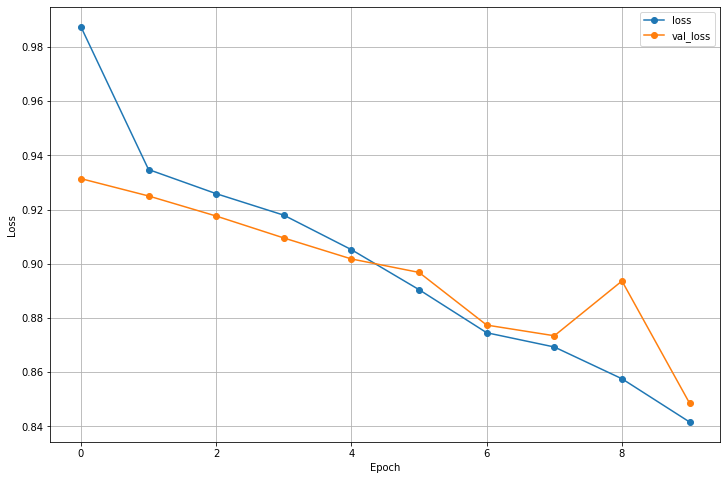

In [64]:
plt.plot(lstm3_FT.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3_FT.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM with FT

In [65]:
lstm3FT_pred = np.round(model.predict(X_test_final))

54/54 [==============================] - 2s 22ms/step


In [66]:
print('Accuracy %s' % accuracy_score(y_test, lstm3FT_pred))
print('F1-score %s' % f1_score(y_test, lstm3FT_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3FT_pred))

Accuracy 0.5224751897256276
F1-score [0.67726397 0.40293809 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       856
           1       0.79      0.27      0.40       709
           2       0.00      0.00      0.00       148

   micro avg       0.61      0.52      0.56      1713
   macro avg       0.45      0.36      0.36      1713
weighted avg       0.61      0.52      0.51      1713
 samples avg       0.52      0.52      0.52      1713



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#CNN classification with FastText - 3 classes

In [67]:
model = Sequential()

model.add(Embedding(max_features, embed_size, weights = [embedding_matrix], trainable =False))
model.add(Dropout(0.4))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

#vanilla dense layer
model.add(Dense(hidden_dims, activation= 'relu'))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#vanilla dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#output layer
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         6000000   
                                                                 
 dropout_9 (Dropout)         (None, None, 300)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 10)          9010      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 10)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                      

In [68]:
cnn3_FT= model.fit(X_train_final, y_train, 
          batch_size = batch_size, 
          epochs=epochs, 
          shuffle=True, 
          validation_split=0.1,
          callbacks= [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
97/97 [==============================] - 10s 99ms/step - loss: 1.0140 - accuracy: 0.4613 - val_loss: 0.9454 - val_accuracy: 0.4365
Epoch 2/20
97/97 [==============================] - 9s 96ms/step - loss: 0.9649 - accuracy: 0.4832 - val_loss: 0.9037 - val_accuracy: 0.5226
Epoch 3/20
97/97 [==============================] - 9s 96ms/step - loss: 0.9434 - accuracy: 0.4981 - val_loss: 0.8842 - val_accuracy: 0.5942
Epoch 4/20
97/97 [==============================] - 9s 96ms/step - loss: 0.9271 - accuracy: 0.5038 - val_loss: 0.8682 - val_accuracy: 0.5839
Epoch 5/20
97/97 [==============================] - 12s 126ms/step - loss: 0.9103 - accuracy: 0.5228 - val_loss: 0.8570 - val_accuracy: 0.6088
Epoch 6/20
97/97 [==============================] - 9s 97ms/step - loss: 0.9030 - accuracy: 0.5304 - val_loss: 0.8470 - val_accuracy: 0.6248
Epoch 7/20
97/97 [==============================] - 9s 96ms/step - loss: 0.8965 - accuracy: 0.5395 - val_loss: 0.8344 - val_accuracy: 0.6277
Epoch 8/20

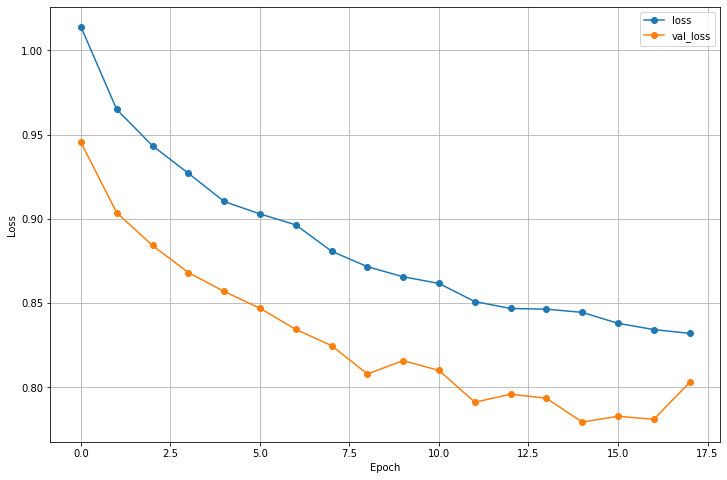

In [69]:
plt.plot(cnn3_FT.history['loss'], label='loss', marker = 'o')
plt.plot(cnn3_FT.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN with FastText

In [70]:
cnn3FT_pred = np.round(model.predict(X_test_final))

54/54 [==============================] - 1s 9ms/step


In [71]:
print('Accuracy %s' % accuracy_score(y_test, cnn3FT_pred))
print('F1-score %s' % f1_score(y_test, cnn3FT_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3FT_pred, zero_division=1))

Accuracy 0.5720957384705195
F1-score [0.70156184 0.33979475 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.55      0.97      0.70       856
           1       0.89      0.21      0.34       709
           2       1.00      0.00      0.00       148

   micro avg       0.58      0.57      0.58      1713
   macro avg       0.81      0.39      0.35      1713
weighted avg       0.73      0.57      0.49      1713
 samples avg       0.59      0.57      0.57      1713



#Classification with Word2Vec

In [72]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [73]:
pip install --upgrade gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 3.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [74]:
import gensim
from gensim.models import Word2Vec

In [75]:
df_en_3['Genre_number'] = df_en_3['Genre'] #converting the strings into int in the Genre column

numbers = []
for i in df_en_3['Genre']:
  if i == 'Rock':
    numbers.append(0)
  
  if i == 'Pop':
    numbers.append(1)
  
  elif i == 'Metal':
   numbers.append(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df_en_3['Genre_number'] = numbers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
#Gensim word2vec requires sentences in input so i split the lyrics into sentences
sentence_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
sentences =[]
sum=0
for lyrics in df_en_3['Lyrics']:
  sents = sentence_splitter.tokenize(lyrics.strip())
  sum+=len(sents)
  for sent in sents:
    sentences.append(sent.split())
print(sum)
print(len(sentences))

8563
8563


In [78]:
#checking that the sentences are in the correct format
for sent in sentences[:5]:
  print(sent, "\n")

['face', 'down', 'with', 'the', 'la', 'curbside', 'endings', 'and', 'the', 'ones', 'in', 'zeros', 'downtown', 'was', 'the', 'perfect', 'place', 'to', 'hide', 'the', 'first', 'star', 'that', 'i', 'saw', 'last', 'night', 'was', 'a', 'headlight', 'of', 'a', 'man', 'made', 'sky', 'but', 'man', 'made', 'never', 'made', 'our', 'dreams', 'collide', 'collide', 'here', 'we', 'are', 'now', 'with', 'the', 'falling', 'sky', 'and', 'the', 'rain', 'we', 're', 'awakening', 'here', 'we', 'are', 'now', 'with', 'our', 'desperate', 'youth', 'and', 'the', 'pain', 'we', 're', 'awakening', 'maybe', 'it', 's', 'called', 'ambition', 'you', 've', 'been', 'talking', 'in', 'your', 'sleep', 'about', 'a', 'dream', 'we', 're', 'awakening', 'last', 'week', 'saw', 'me', 'living', 'for', 'nothing', 'but', 'deadlines', 'with', 'my', 'dead', 'beat', 'sky', 'but', 'this', 'town', 'doesn', 't', 'look', 'the', 'same', 'tonight', 'these', 'dreams', 'started', 'singing', 'to', 'me', 'out', 'of', 'nowhere', 'and', 'in', 'all'

In [79]:
#creating the w2v embeddings
w2v_model=gensim.models.Word2Vec(sentences=sentences, vector_size=300, window=10, min_count=1)

In [80]:
w2v_model.train(sentences, epochs=10, total_examples=len(sentences))

(16151228, 22825300)

In [81]:
#total num of extracted words
vocab = w2v_model.wv.index_to_key
print("Total number of words: ", len(vocab))

Total number of words:  33957


In [82]:
w2v_model.wv.most_similar('best')

[('worst', 0.45578721165657043),
 ('friend', 0.4094197452068329),
 ('hardest', 0.3591359555721283),
 ('rest', 0.35621148347854614),
 ('specialty', 0.34964266419410706),
 ('only', 0.3439793586730957),
 ('test', 0.341199666261673),
 ('mpression', 0.31666550040245056),
 ('prowess', 0.3156172037124634),
 ('comparisons', 0.30743640661239624)]

In [83]:
#creating a dictionary with words in vocab and their embeddings. It will be used to create the embedding matrix 

word_vec_dict={}

for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)

len(word_vec_dict)

33957

In [84]:
#finding the max length of the lyrics
maxi = -1
for i, lyrics in enumerate(df_en_3['Lyrics']):
  tokens=lyrics.split()
  if(len(tokens)>maxi):
    maxi=len(tokens)

print(maxi)

1924


In [85]:
#integer encoding the words in the lyrics using Keras Tokenizer
tok=Tokenizer()
tok.fit_on_texts(df_en_3['Lyrics'])
vocab_size = len(tok.word_index) +1
encoded_lyrics = tok.texts_to_sequences(df_en_3['Lyrics'])

In [86]:
max_lyrics_len=maxi
embed_dim = 300

#padding every sequence to the max length
padded_lyrics=pad_sequences(encoded_lyrics, maxlen=max_lyrics_len, padding='post')
padded_lyrics.shape

(8563, 1924)

In [87]:
vocab_size

33912

In [88]:
#creating the embedding matrix
embed_matrix = np.zeros(shape=(vocab_size, embed_dim))
for word, i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None: #if the word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
    #if the word is not found, the vector corresponding to the embedding will be filled with zeros

In [89]:
Y= to_categorical(df_en_3['Genre_number'], 3) #transforming the labels into one hot vectors
x_train,x_test,y_train,y_test=train_test_split(padded_lyrics, Y,test_size=0.20,random_state=42)

In [90]:
y_train.shape, y_test.shape

((6850, 3), (1713, 3))

#LSTM Classification with Word2vec - 3 classes

In [91]:
from keras.initializers import Constant


In [92]:
epochs=5
batch_size=64

In [93]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable = False, embeddings_initializer=Constant(embed_matrix)))
model.add(LSTM(12, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1, momentum=0.8), metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1924, 300)         10173600  
                                                                 
 lstm_2 (LSTM)               (None, 12)                15024     
                                                                 
 dropout_12 (Dropout)        (None, 12)                0         
                                                                 
 dense_12 (Dense)            (None, 24)                312       
                                                                 
 dropout_13 (Dropout)        (None, 24)                0         
                                                                 
 dense_13 (Dense)            (None, 3)                 75        
                                                                 
Total params: 10,189,011
Trainable params: 15,411
Non-

In [94]:
lstm3_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
86/86 [==============================] - 352s 4s/step - loss: 0.9362 - accuracy: 0.5064 - val_loss: 0.9385 - val_accuracy: 0.4912
Epoch 2/5
86/86 [==============================] - 337s 4s/step - loss: 0.9246 - accuracy: 0.5068 - val_loss: 0.9386 - val_accuracy: 0.4912
Epoch 3/5
86/86 [==============================] - 339s 4s/step - loss: 0.9253 - accuracy: 0.5077 - val_loss: 0.9380 - val_accuracy: 0.4912
Epoch 4/5
86/86 [==============================] - 338s 4s/step - loss: 0.9245 - accuracy: 0.5005 - val_loss: 0.9392 - val_accuracy: 0.4912
Epoch 5/5
86/86 [==============================] - 337s 4s/step - loss: 0.9240 - accuracy: 0.5077 - val_loss: 0.9385 - val_accuracy: 0.4912


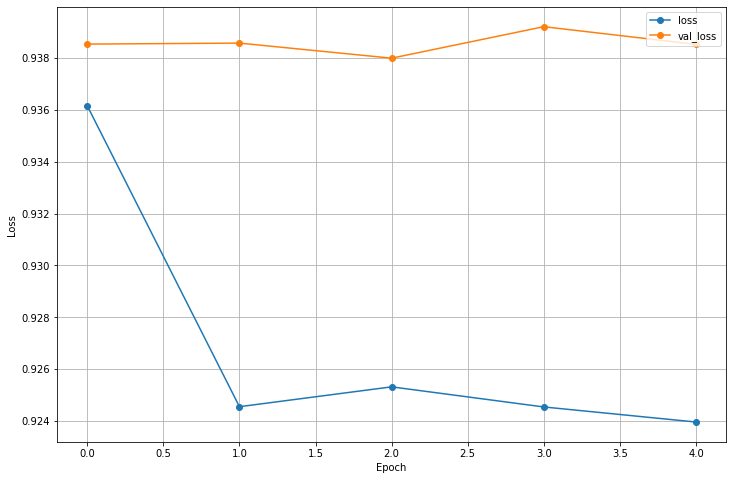

In [95]:
plt.plot(lstm3_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM CLassification with w2v

In [96]:
lstm3W2V_pred = np.round(model.predict(x_test))

54/54 [==============================] - 15s 272ms/step


In [97]:
print('Accuracy %s' % accuracy_score(y_test, lstm3W2V_pred))
print('F1-score %s' % f1_score(y_test, lstm3W2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3W2V_pred))

Accuracy 0.0
F1-score [0. 0. 0.]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       863
           1       1.00      0.00      0.00       693
           2       1.00      0.00      0.00       157

   micro avg       1.00      0.00      0.00      1713
   macro avg       1.00      0.00      0.00      1713
weighted avg       1.00      0.00      0.00      1713
 samples avg       1.00      0.00      0.00      1713



#CNN Classification with Word2Vec - 3 classes

In [98]:
filters=10
kernel_size=3
epochs=20

In [99]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable= False, embeddings_initializer=Constant(embed_matrix)))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1924, 300)         10173600  
                                                                 
 conv1d_2 (Conv1D)           (None, 1922, 10)          9010      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 10)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                352       
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                      

In [100]:
cnn3_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
86/86 [==============================] - 45s 522ms/step - loss: 1.0945 - accuracy: 0.4703 - val_loss: 0.9362 - val_accuracy: 0.4920
Epoch 2/20
86/86 [==============================] - 45s 521ms/step - loss: 0.9308 - accuracy: 0.5005 - val_loss: 0.9122 - val_accuracy: 0.5686
Epoch 3/20
86/86 [==============================] - 45s 522ms/step - loss: 0.9013 - accuracy: 0.5456 - val_loss: 0.8988 - val_accuracy: 0.5745
Epoch 4/20
86/86 [==============================] - 45s 520ms/step - loss: 0.8928 - accuracy: 0.5595 - val_loss: 0.8810 - val_accuracy: 0.5920
Epoch 5/20
86/86 [==============================] - 45s 520ms/step - loss: 0.8768 - accuracy: 0.5688 - val_loss: 0.8790 - val_accuracy: 0.6015
Epoch 6/20
86/86 [==============================] - 48s 563ms/step - loss: 0.8649 - accuracy: 0.5819 - val_loss: 0.8654 - val_accuracy: 0.5964
Epoch 7/20
86/86 [==============================] - 45s 519ms/step - loss: 0.8572 - accuracy: 0.5854 - val_loss: 0.8807 - val_accuracy: 0.5803

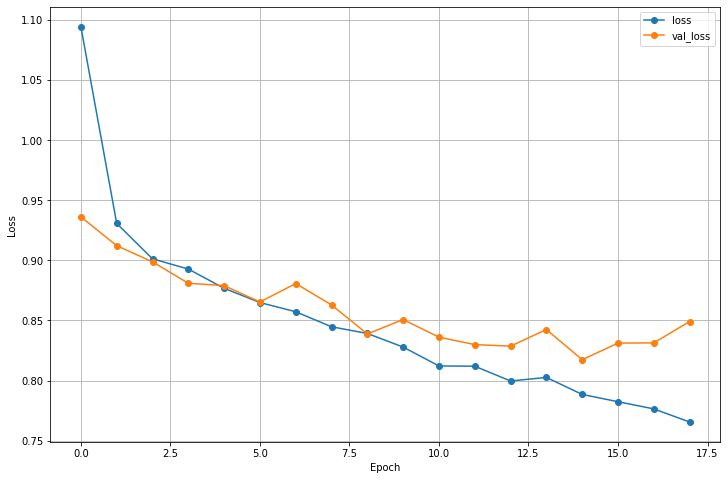

In [101]:
plt.plot(cnn3_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(cnn3_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN Classification with w2v

In [102]:
cnn3W2V_pred = np.round(model.predict(x_test))

54/54 [==============================] - 4s 75ms/step


In [103]:
print('Accuracy %s' % accuracy_score(y_test, cnn3W2V_pred))
print('F1-score %s' % f1_score(y_test, cnn3W2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3W2V_pred, zero_division=1))

Accuracy 0.5487448920023351
F1-score [0.70035461 0.34722222 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.57      0.92      0.70       863
           1       0.88      0.22      0.35       693
           2       1.00      0.00      0.00       157

   micro avg       0.60      0.55      0.57      1713
   macro avg       0.81      0.38      0.35      1713
weighted avg       0.73      0.55      0.49      1713
 samples avg       0.64      0.55      0.55      1713

